In [4]:
import numpy as np
import random
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy import stats
from sklearn.decomposition import PCA
import seaborn as sns
import random
import sys
import copy
from igraph import *
import time
import numpy as np
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [5]:
g = Graph.Read_Ncol("powergrid", directed = False)
with open('redes e centralidades/centralidades-powergrid-picke.txt', 'rb') as f:
    centralidade_list = pickle.load(f)

In [6]:
for i in centralidade_list:
    
    print sorted(i,reverse=True)[:10],'\n'

[0.003846153846153846, 0.0036437246963562753, 0.0028340080971659917, 0.0028340080971659917, 0.0028340080971659917, 0.002631578947368421, 0.002631578947368421, 0.002631578947368421, 0.002631578947368421, 0.002631578947368421] 

[0.28841562147939726, 0.2816981233162447, 0.2796951897344534, 0.27764988777849786, 0.2673044750046763, 0.24827101665302195, 0.23651669104994463, 0.20523301004236538, 0.2049539625669131, 0.20311626353593526] 

[0.001215144665273708, 0.0010662806203325327, 0.0010631478541278307, 0.0009995633191994893, 0.000943235461166511, 0.0008289069036170618, 0.0008266355777684404, 0.0008206364372378332, 0.0008072742031778136, 0.000771504539011886] 

[0.08182330142114155, 0.0809437981320662, 0.08035786905246035, 0.07987194619153098, 0.0796260477111541, 0.07932684587468285, 0.07918570169111165, 0.07911468426194328, 0.07877280265339967, 0.07803121248499399] 

[0.2865344997425941, 0.27451470848011417, 0.24822112815712555, 0.24290464678318427, 0.23627243283037444, 0.2213075570530621

In [7]:
len(centralidade_list)

7

In [24]:
X = np.array(centralidade_list)
X = X.transpose()
X[5] = stats.zscore(X[5])

# problemas de escala

# X = stats.zscore(X)
X.shape

(4941, 7)

In [25]:
varience_values = []

pca = PCA(n_components=1,svd_solver='full')
teste = pca.fit_transform(X)
explained_varience = pca.explained_variance_ratio_.sum()
print(float(pca.explained_variance_ratio_.sum()*100))
print(pca.explained_variance_ratio_,len(pca.explained_variance_ratio_))
print(pca.singular_values_,len(pca.singular_values_))  

99.9999610697
(array([0.99999961]), 1)
(array([3311.04875553]), 1)


In [26]:
lista_teste = teste.tolist()
len(lista_teste)
#  a partir daqui é so pegar os index igual no que ja tem
pca_values = []
for sublist in lista_teste:
    for item in sublist:
        pca_values.append(item)
        
len(pca_values)
# print(flat_list[:50])

4941

In [27]:
labels_medidas = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality']
labels_medidas

['0_grau',
 '1_betweennes',
 '2_pagerank',
 '3_closeness',
 '4_eigenvector_centrality',
 '5_harmonic_centrality',
 '6_load_centrality']

In [28]:
#  A partir daqui analise de correlacao entre as medidas

In [29]:
def calcula_PCA(matrix,col1,col2): # pca entre duas colunas
    vindex = [i for i in range(g.vcount())]
    
    Y = np.array([matrix[:,col1],matrix[:,col2]])
    Y = Y.transpose()
#     print (Y.shape)
#     print (Y,type(Y),type(Y[0]),len(Y[0]))
    
    pca = PCA(n_components=1,svd_solver='full')
    teste = pca.fit_transform(Y)
    explained_varience = pca.explained_variance_ratio_.sum()
    print(float(pca.explained_variance_ratio_.sum()*100))
    lista_teste = teste.tolist()
    flat_list = []
    for sublist in lista_teste:
        for item in sublist:
            flat_list.append(item)
    aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(flat_list, vindex), reverse=True)))
    return (seeds_PCA,np.array(flat_list))

In [30]:
def calcKendall(matrix):
    matrix_kendall = []
    for i in range(matrix.shape[1]):
        kend = []
        for j in range(matrix.shape[1]):
            tau, p_value = kendalltau(matrix[:,i],matrix[:,j])
            kend.append(tau)
        matrix_kendall.append(kend)
    matrix_kendall = np.array(matrix_kendall)
    return(matrix_kendall)

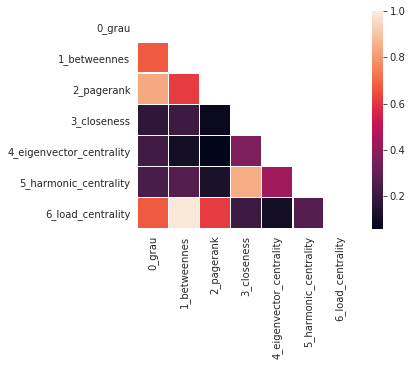

In [31]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

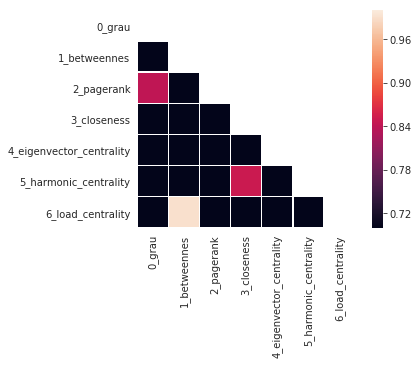

In [32]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmin=.7,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

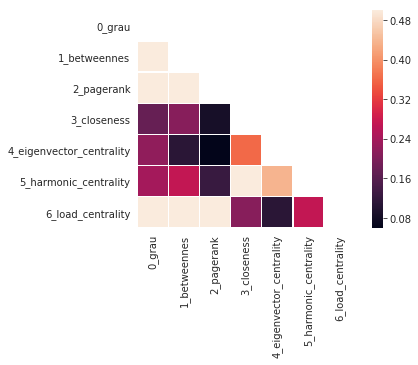

In [33]:
corr = calcKendall(X)
# sns.heatmap(,xticklabels=labels,yticklabels=labels,linewidths=.5)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, vmax = .5,mask=mask,square=True,xticklabels=labels_medidas,yticklabels=labels_medidas,linewidths=.5)

In [34]:
a = np.array(pca_values)
a = a.reshape(len(a),1)
X = np.append(X,a,axis=1)
X.shape

(4941, 8)

In [35]:
matrix_teste = X

In [37]:
# Alta correlacao powergrid

c_0_2 = calcula_PCA(matrix_teste,0,2)
c_1_6 = calcula_PCA(matrix_teste,1,6)
c_3_4 = calcula_PCA(matrix_teste,3,4)




99.9488992854
99.9914198829
71.4107476999


In [38]:
# Baixa correlacao powergrid

c_0_3 = calcula_PCA(matrix_teste,0,3)
c_0_4 = calcula_PCA(matrix_teste,0,4)
c_0_5 = calcula_PCA(matrix_teste,0,5)

c_1_3 = calcula_PCA(matrix_teste,1,3)
c_1_4 = calcula_PCA(matrix_teste,1,4)
c_1_5 = calcula_PCA(matrix_teste,1,5)

c_6_3 = calcula_PCA(matrix_teste,6,3)
c_6_4 = calcula_PCA(matrix_teste,6,4)
c_6_5 = calcula_PCA(matrix_teste,6,5)



88.1442138507
89.5882903711
99.9999984893
82.9623299135
59.4514059492
99.9999880946
82.9089886533
59.3374862043
99.99998818


In [39]:
#  adicionando na matrix temporaria CA-GRQC
matrix_teste = np.hstack((matrix_teste, np.array([c_0_2[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_6[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_3_4[1]]).transpose()))


matrix_teste = np.hstack((matrix_teste, np.array([c_0_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_0_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_0_5[1]]).transpose()))

matrix_teste = np.hstack((matrix_teste, np.array([c_1_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_1_5[1]]).transpose()))

matrix_teste = np.hstack((matrix_teste, np.array([c_6_3[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_6_4[1]]).transpose()))
matrix_teste = np.hstack((matrix_teste, np.array([c_6_5[1]]).transpose()))
matrix_teste.shape



(4941, 20)

In [40]:
# olhando correlacao das novas medidas da matrix teste

In [41]:
# Ca-GRQC
labels = ['0_grau','1_betweennes','2_pagerank','3_closeness','4_eigenvector_centrality','5_harmonic_centrality','6_load_centrality','7_PCA_all','02','16','34','03','04','05','13','14','15','63','64','65']



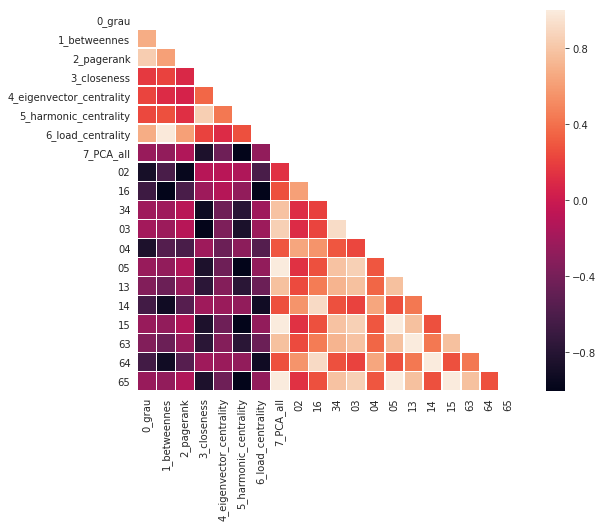

In [42]:
# 
a = plt.figure(figsize=(10,7))
corr = calcKendall(matrix_teste)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask,square=True,xticklabels=labels,yticklabels=labels,linewidths=.5)

In [43]:
import pandas as pd


In [44]:
vindex = [i for i in range(g.vcount())]

my_list = X
### my_list[0] = grau
### my_list[1] = betweenness
### my_list[2] = pagerank
### my_list[3] = closeness
### my_list[4] = eigenvector_centrality
### my_list[5] = harmonic_centrality
### my_list[6] = load_centrality 
### my_list[7] = PCA_all
### ...etc
aflat, seeds_grau = (list(x) for x in zip(*sorted(zip(my_list[:,0], vindex), reverse=True)))
aflat, seeds_betweennes = (list(x) for x in zip(*sorted(zip(my_list[:,1], vindex), reverse=True)))
aflat, seeds_pagerank = (list(x) for x in zip(*sorted(zip(my_list[:,2], vindex), reverse=True)))
aflat, seeds_closeness = (list(x) for x in zip(*sorted(zip(my_list[:,3], vindex), reverse=True)))
aflat, seeds_eigenvector_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,4], vindex), reverse=True)))
aflat, seeds_harmonic_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,5], vindex), reverse=True)))
aflat, seeds_load_centrality = (list(x) for x in zip(*sorted(zip(my_list[:,6], vindex), reverse=True)))
aflat, seeds_PCA = (list(x) for x in zip(*sorted(zip(pca_values, vindex), reverse=True)))


In [ ]:
'02','16','34','03','04','05','13','14','15','63','64','65']

In [47]:
d = {'0_grau' : seeds_grau[:100],'1_betweennes':seeds_betweennes[:100],
     '2_pagerank' :seeds_pagerank[:100],'3_closeness':seeds_closeness[:100],
     '4_eigenvector_centrality':seeds_eigenvector_centrality[:100],'5_harmonic_centrality':seeds_harmonic_centrality[:100],
     '6_load_centrality':seeds_load_centrality[:100],'7_PCA_all':seeds_PCA[:100],
     'm_0_2':c_0_2[0][:100],
     'm_1_6':c_1_6[0][:100],
     'm_34':c_3_4[0][:100],
     'm_03':c_0_3[0][:100],
     'm_04':c_0_4[0][:100],
     'm_05':c_0_5[0][:100],     
     'm_13':c_1_3[0][:100],
     'm_14':c_1_4[0][:100],
     'm_15':c_1_5[0][:100],
     'm_63':c_6_3[0][:100],
     'm_64':c_6_4[0][:100],
     'm_65':c_6_5[0][:100]
    }

In [49]:
df = pd.DataFrame(data=d)
df.head(10)

,0_grau,1_betweennes,2_pagerank,3_closeness,4_eigenvector_centrality,5_harmonic_centrality,6_load_centrality,7_PCA_all,m_03,m_04,m_05,m_0_2,m_13,m_14,m_15,m_1_6,m_34,m_63,m_64,m_65
0,3136,300,197,1749,4522,3024,300,5,5,5,5,5,5,5,5,5,5,5,5,5
1,197,661,786,1759,4516,683,661,4589,4589,4718,4589,4541,4589,4718,4589,4939,478,4589,4718,4589
2,4516,1683,3571,2098,4515,661,684,4592,4592,4901,4592,4567,4592,4901,4592,4937,4859,4592,4901,4592
3,3571,684,3136,1748,4546,2098,1683,4718,4577,3942,4718,4554,4577,3942,4718,4932,3960,4577,3942,4718
4,786,683,1446,3024,4524,1749,683,478,4591,3990,478,4578,4591,3990,478,4929,3959,4591,3990,478
5,4045,1425,814,1683,4525,300,1425,4591,4571,4644,4591,4517,4572,4644,4591,4928,3956,4572,4644,4591
6,2871,1749,2427,615,4542,684,1749,4577,4576,3972,4577,4593,4571,3972,4577,4926,4718,4571,3972,4577
7,2699,1459,2871,1758,4549,1759,509,4859,4572,3970,4859,4565,4576,3970,4859,4922,498,4576,3970,4859
8,2427,509,2790,683,4555,1683,1459,4571,4590,4815,4571,4564,4590,4815,4571,4921,448,4590,4815,4571
9,660,3024,4045,1762,4557,1425,3024,4576,4587,3842,4576,4577,4569,3842,4576,4920,444,4569,3842,4576


In [50]:
s = [seeds_grau[:50],seeds_betweennes[:50],
    seeds_pagerank[:50],seeds_closeness[:50],
    seeds_eigenvector_centrality[:50],seeds_harmonic_centrality[:50],
    seeds_load_centrality[:50],seeds_PCA[:50],
    c_0_2[0][:50],
    c_1_6[0][:50],
    c_3_4[0][:50],
    c_0_3[0][:50],
    c_0_4[0][:50],
    c_0_5[0][:50],     
    c_1_3[0][:50],
    c_1_4[0][:50],
    c_1_5[0][:50],
    c_6_3[0][:50],
    c_6_4[0][:50],
    c_6_5[0][:50]]
with open('sementes-powergrid.txt', 'wb') as f:
    pickle.dump(s, f)

In [27]:
s = [
    c_1_6[0][:50],
    c_3_4[0][:50],
    c_3_5[0][:50],
    c_4_5[0][:50],
    c_1_3[0][:50],
    c_1_4[0][:50],
    c_1_5[0][:50],
    c_2_3[0][:50],
    c_2_4[0][:50],
    c_2_5[0][:50],
    c_6_3[0][:50],
    c_6_4[0][:50],
    c_6_5[0][:50]]
with open('sementes-CA-GrQc.txt', 'wb') as f:
    pickle.dump(s, f)